# Import

In [32]:
# Initialize python env
# !pip install -r requirements.txt

In [33]:
import os
import urllib.request
import pandas as pd

import sqlite3

# Importing dataset
DATA_PATH = os.path.join("data", "nhgh.tsv")
gh_data = pd.read_csv(DATA_PATH, sep='\t')
gh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seqn     6795 non-null   int64  
 1   sex      6795 non-null   object 
 2   age      6795 non-null   float64
 3   re       6795 non-null   object 
 4   income   6475 non-null   object 
 5   tx       6795 non-null   int64  
 6   dx       6795 non-null   int64  
 7   wt       6795 non-null   float64
 8   ht       6795 non-null   float64
 9   bmi      6795 non-null   float64
 10  leg      6564 non-null   float64
 11  arml     6616 non-null   float64
 12  armc     6607 non-null   float64
 13  waist    6556 non-null   float64
 14  tri      6314 non-null   float64
 15  sub      5824 non-null   float64
 16  gh       6795 non-null   float64
 17  albumin  6706 non-null   float64
 18  bun      6706 non-null   float64
 19  SCr      6706 non-null   float64
dtypes: float64(14), int64(3), object(3)
memory usage: 1.

# Data Preprocessing

### Data Dictionary (provided)
<TABLE BORDER>
<tr><td><h3>Name</h3></td><td><h3>Labels</h3></td><td><h3>Units</h3></td><td><h3>Levels</h3></td><td><h3>Class</h3></td><td><h3>Storage</h3></td><td><h3>NAs</h3></td></tr>
<tr><td>seqn</td><td>Respondent sequence number</td><td></td><td></td><td>integer</td><td>integer</td><td><div align=right>  0</div></td></tr>
<tr><td>sex</td><td></td><td></td><td><a href="#levels.sex"> 2</a></td><td></td><td>integer</td><td><div align=right>  0</div></td></tr>
<tr><td>age</td><td>Age</td><td>years</td><td></td><td>numeric</td><td>double</td><td><div align=right>  0</div></td></tr>
<tr><td>re</td><td>Race/Ethnicity</td><td></td><td><a href="#levels.re"> 5</a></td><td></td><td>integer</td><td><div align=right>  0</div></td></tr>
<tr><td>income</td><td>Family Income</td><td></td><td><a href="#levels.income">14</a></td><td></td><td>integer</td><td><div align=right>320</div></td></tr>
<tr><td>tx</td><td>On Insulin or Diabetes Meds</td><td></td><td></td><td>integer</td><td>integer</td><td><div align=right>  0</div></td></tr>
<tr><td>dx</td><td>Diagnosed with DM or Pre-DM</td><td></td><td></td><td>integer</td><td>integer</td><td><div align=right>  0</div></td></tr>
<tr><td>wt</td><td>Weight</td><td>kg</td><td></td><td>numeric</td><td>double</td><td><div align=right>  0</div></td></tr>
<tr><td>ht</td><td>Standing Height</td><td>cm</td><td></td><td>numeric</td><td>double</td><td><div align=right>  0</div></td></tr>
<tr><td>bmi</td><td>Body Mass Index</td><td>kg/m^2</td><td></td><td>numeric</td><td>double</td><td><div align=right>  0</div></td></tr>
<tr><td>leg</td><td>Upper Leg Length</td><td>cm</td><td></td><td>numeric</td><td>double</td><td><div align=right>231</div></td></tr>
<tr><td>arml</td><td>Upper Arm Length</td><td>cm</td><td></td><td>numeric</td><td>double</td><td><div align=right>179</div></td></tr>
<tr><td>armc</td><td>Arm Circumference</td><td>cm</td><td></td><td>numeric</td><td>double</td><td><div align=right>188</div></td></tr>
<tr><td>waist</td><td>Waist Circumference</td><td>cm</td><td></td><td>numeric</td><td>double</td><td><div align=right>239</div></td></tr>
<tr><td>tri</td><td>Triceps Skinfold</td><td>mm</td><td></td><td>numeric</td><td>double</td><td><div align=right>481</div></td></tr>
<tr><td>sub</td><td>Subscapular Skinfold</td><td>mm</td><td></td><td>numeric</td><td>double</td><td><div align=right>971</div></td></tr>
<tr><td>gh</td><td>Glycohemoglobin</td><td>%</td><td></td><td>numeric</td><td>double</td><td><div align=right>  0</div></td></tr>
<tr><td>albumin</td><td>Albumin</td><td>g/dL</td><td></td><td>numeric</td><td>double</td><td><div align=right> 89</div></td></tr>
<tr><td>bun</td><td>Blood urea nitrogen</td><td>mg/dL</td><td></td><td>integer</td><td>integer</td><td><div align=right> 89</div></td></tr>
<tr><td>SCr</td><td>Creatinine</td><td>mg/dL</td><td></td><td>numeric</td><td>double</td><td><div align=right> 89</div></td></tr>
</TABLE>

In [34]:
# Defining categorical variables
cat_attribs = ["sex", "re", "income", "tx", "dx"]
excluded_attribs = ["seqn", "gh", "diabetes"] # remove seqn from the numerical variables
num_attribs = [x for x in gh_data.columns if x not in cat_attribs+excluded_attribs]

print(cat_attribs)
print(num_attribs)

['sex', 're', 'income', 'tx', 'dx']
['age', 'wt', 'ht', 'bmi', 'leg', 'arml', 'armc', 'waist', 'tri', 'sub', 'albumin', 'bun', 'SCr']


In [35]:
gh_data.head()

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79


In [36]:
gh_data.describe()

,seqn,age,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
count,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6564.000000,6616.000000,6607.000000,6556.000000,6314.000000,5824.000000,6795.000000,6706.000000,6706.000000,6706.000000
mean,56872.080500,44.285700,0.091832,0.134511,79.370625,167.042958,28.321741,38.409324,36.874607,32.485152,96.254149,18.787726,19.961556,5.676586,4.273621,12.917686,0.878627
std,3043.535776,20.594593,0.288810,0.341225,21.930903,10.264984,6.950110,3.876902,2.781616,5.297660,17.059193,8.319393,8.369083,0.964700,0.326545,5.717571,0.445238
min,51624.000000,12.000000,0.000000,0.000000,28.000000,123.300000,13.180000,20.400000,24.800000,16.800000,52.000000,2.600000,3.800000,4.000000,2.500000,1.000000,0.140000
25%,54245.500000,25.666667,0.000000,0.000000,64.000000,159.600000,23.430000,36.000000,35.000000,28.850000,83.500000,12.000000,13.000000,5.200000,4.100000,9.000000,0.700000
50%,56873.000000,43.750000,0.000000,0.000000,76.300000,166.600000,27.290000,38.400000,36.800000,32.100000,95.300000,17.900000,19.400000,5.500000,4.300000,12.000000,0.830000
75%,59510.500000,61.333333,0.000000,0.000000,91.100000,174.500000,31.880000,41.000000,38.800000,35.600000,106.900000,25.000000,26.200000,5.800000,4.500000,15.000000,0.980000
max,62160.000000,80.000000,1.000000,1.000000,239.400000,202.700000,84.870000,50.600000,47.000000,61.000000,179.000000,41.100000,40.400000,16.400000,5.300000,90.000000,15.660000


The data has been correctly imported as a pandas dataframe. We have 6795 total observations but only 5824 valid `sub` observations, as noted by the data dictionary. 

The column types line up with the data dictionary above, except for `bun`. I'll leave it as float64 to ensure compatibility if we increase precision in the future.

In [37]:
for cat in cat_attribs:
    print(gh_data.value_counts(cat))

sex
female    3423
male      3372
Name: count, dtype: int64
re
Non-Hispanic White                   3117
Mexican American                     1366
Non-Hispanic Black                   1217
Other Hispanic                        706
Other Race Including Multi-Racial     389
Name: count, dtype: int64
income
>= 100000         877
[25000,35000)     845
[35000,45000)     610
[75000,100000)    564
[20000,25000)     563
[10000,15000)     531
[45000,55000)     522
[15000,20000)     456
[55000,65000)     376
[5000,10000)      315
[65000,75000)     274
[0,5000)          235
> 20000           232
< 20000            75
Name: count, dtype: int64
tx
0    6171
1     624
Name: count, dtype: int64
dx
0    5881
1     914
Name: count, dtype: int64


Overlap of `income` variable. Decide what to do after investigating if there is significant effect on the target variable. 

In [38]:
# Setting of target variable
DIABETES_THRESH = 6.5 # diabetes threshold in %, diabetes is defined as gh >= DIABETES THRESH
gh_data["diabetes"] = [1 if x >= DIABETES_THRESH else 0 for x in gh_data["gh"]]
gh_data["diabetes"].value_counts()

diabetes
0    6167
1     628
Name: count, dtype: int64

As commonly seen in healthcare datasets, the dataset is imbalanced, where about 10% of the dataset is the positive class. Might need to do upsampling.

# 1: Baseline Models
I remove all observations with NAs and fit the 3 models with the default hyperparameters to get a first estimation of modelling performance

In [104]:
gh_data_dropna = gh_data.dropna()
print(gh_data_dropna.count())
gh_data_dropna.describe()

seqn        5343
sex         5343
age         5343
re          5343
income      5343
tx          5343
dx          5343
wt          5343
ht          5343
bmi         5343
leg         5343
arml        5343
armc        5343
waist       5343
tri         5343
sub         5343
gh          5343
albumin     5343
bun         5343
SCr         5343
diabetes    5343
dtype: int64


,seqn,age,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr,diabetes
count,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000,5343.000000
mean,56885.800674,43.484201,0.073741,0.113794,75.610107,167.280629,26.905166,38.542691,36.768351,31.589145,93.263073,18.030788,19.696163,5.601235,4.307505,12.837357,0.871535,0.071870
std,3054.478161,20.972962,0.261374,0.317590,18.248607,10.217584,5.568324,3.844641,2.743150,4.627345,15.034900,8.012575,8.259365,0.871702,0.316408,5.562040,0.401603,0.258296
min,51624.000000,12.000000,0.000000,0.000000,28.000000,135.400000,13.180000,24.000000,27.000000,17.600000,52.000000,2.600000,3.800000,4.000000,2.500000,1.000000,0.320000,0.000000
25%,54256.500000,23.666667,0.000000,0.000000,62.600000,159.900000,22.845000,36.000000,34.800000,28.400000,82.000000,11.400000,13.000000,5.200000,4.100000,9.000000,0.700000,0.000000
50%,56878.000000,42.750000,0.000000,0.000000,74.000000,166.900000,26.470000,38.500000,36.700000,31.500000,93.000000,17.000000,19.100000,5.400000,4.300000,12.000000,0.830000,0.000000
75%,59542.500000,61.083333,0.000000,0.000000,86.600000,174.800000,30.215000,41.200000,38.600000,34.600000,103.200000,23.800000,25.800000,5.800000,4.500000,15.000000,0.980000,0.000000
max,62158.000000,80.000000,1.000000,1.000000,176.600000,202.700000,55.040000,50.600000,47.000000,50.300000,160.600000,41.100000,40.400000,15.500000,5.300000,90.000000,15.660000,1.000000


In [44]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks





num_scale_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

cat_onehot = Pipeline([
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])




resample_pipeline = Pipeline([
        ("oversample_smote", SMOTE(sampling_strategy=1)),
        ("undersample_tomek", TomekLinks()),
    ])

preprocess_pipeline_onehot = ColumnTransformer([
        ("num_scaling", num_scale_pipeline, num_attribs),
        ("cat_onehot", cat_onehot, cat_attribs),
    ])


X = preprocess_pipeline_onehot.fit_transform(gh_data_dropna[num_attribs + cat_attribs])
X_feature_names = preprocess_pipeline_onehot.get_feature_names_out()
y = gh_data_dropna["diabetes"]
print(y.value_counts())


# X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train, y_train)
# print(y_train_resampled.value_counts())

diabetes
0    4959
1     384
Name: count, dtype: int64


In [55]:
# Modelling
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import numpy as np


def model_accuracy(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    sns.stripplot(x=y_test, 
                  y=y_pred_proba, 
                  hue=y_test,
                  palette="mako")
    
    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    print(f"Model {clf.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print("AUC ROC:", roc)
    

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
    disp.plot()
    plt.show()

np.random.seed(0) # Set seed for reproducibility

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model LogisticRegressionCV
Accuracy: 0.9663236669784846
Precision: 0.7096774193548387
Recall: 0.7096774193548387
F1: 0.7096774193548387
AUC ROC: 0.8459012717429606


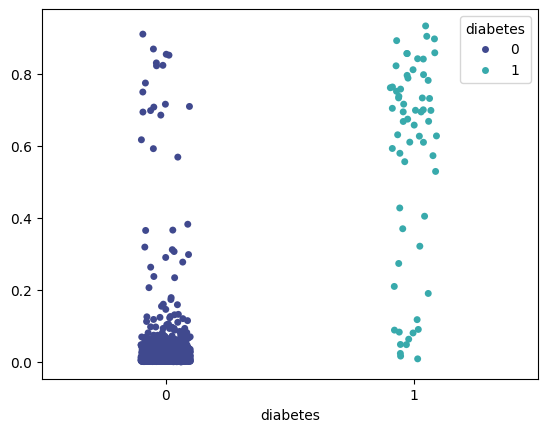

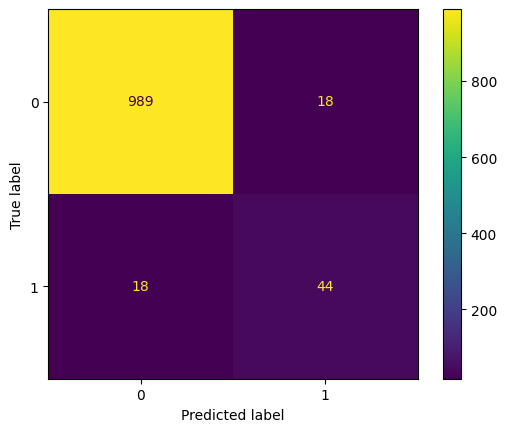

In [56]:
# Instantiate logistic regression
logreg = LogisticRegressionCV(cv=10)
logreg.fit(X_train, y_train)
model_accuracy(logreg, X_test, y_test)

Model DecisionTreeClassifier
Accuracy: 0.9345182413470533
Precision: 0.44594594594594594
Recall: 0.532258064516129
F1: 0.4852941176470588
AUC ROC: 0.7457715347406861


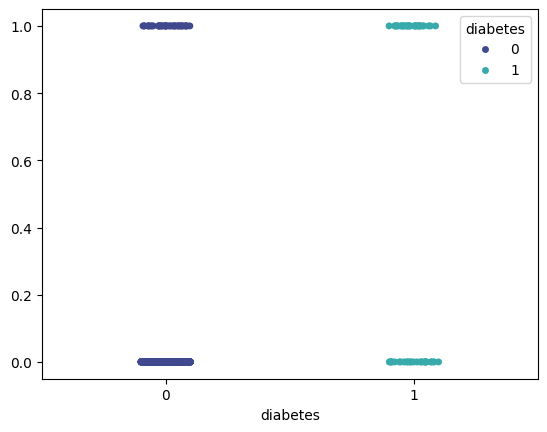

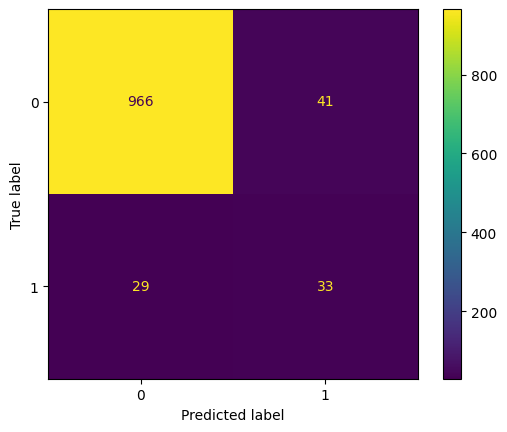

In [57]:
# Instantiate decision tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
model_accuracy(decisiontree, X_test, y_test)


Model RandomForestClassifier
Accuracy: 0.960710944808232
Precision: 0.65625
Recall: 0.6774193548387096
F1: 0.6666666666666666
AUC ROC: 0.8277861421661273


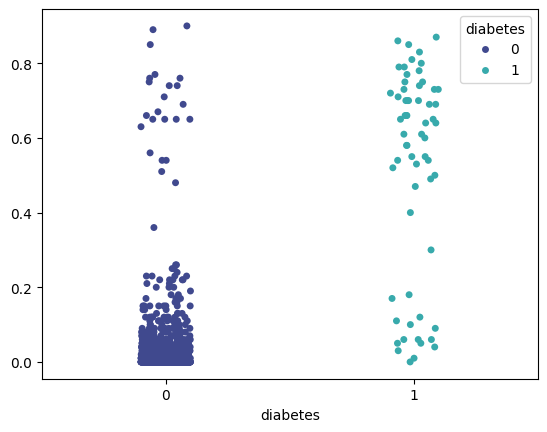

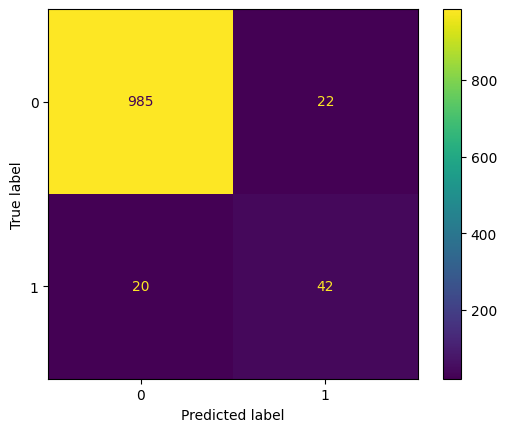

In [58]:
# Instantiate random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
model_accuracy(rf, X_test, y_test)

From the performance metrics, all 3 models are competitive. Let's explore the significant variables to see if they make sense:

In [101]:
# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)

i = 0
# Printing out the p-value for each feature
for feature in np.concatenate((['const'], X_feature_names)):
    print(f"{feature} \t {sm_model.pvalues[i]}")
    i += 1

const 	 nan
num_scaling__age 	 2.5656819892866374e-05
num_scaling__wt 	 0.7141637237068481
num_scaling__ht 	 0.7061449209839002
num_scaling__bmi 	 0.6005593395375985
num_scaling__leg 	 0.5577605499260916
num_scaling__arml 	 0.9499426313000265
num_scaling__armc 	 0.4759124341024955
num_scaling__waist 	 0.001464930704935559
num_scaling__tri 	 0.18023433129723698
num_scaling__sub 	 0.0015445670435413018
num_scaling__albumin 	 0.0020147459980266987
num_scaling__bun 	 0.6036492195293499
num_scaling__SCr 	 0.1283713377005598
cat_onehot__sex_female 	 0.999999832636202
cat_onehot__sex_male 	 0.9999999347807387
cat_onehot__re_Mexican American 	 0.9999999556236274
cat_onehot__re_Non-Hispanic Black 	 0.9999999052600814
cat_onehot__re_Non-Hispanic White 	 0.9999998193397848
cat_onehot__re_Other Hispanic 	 0.9999999490226871
cat_onehot__re_Other Race Including Multi-Racial 	 0.9999999290816901
cat_onehot__income_< 20000 	 0.9999999745574595
cat_onehot__income_> 20000 	 0.9999999960122138
cat_onehot

C:\Users\nakur\AppData\Local\Temp\ipykernel_62428\1201158407.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{feature} \t {sm_model.pvalues[i]}")


Taking a guideline of p-value < 0.05 as significant, I can see that `waist`, `sub`, `albumin` signal the presence of diabetes. This aligns with domain knowledge where obesity is a predictor of diabetes.

[Text(0.4166666666666667, 0.9285714285714286, 'cat_onehot__tx_0 <= 0.5\ngini = 0.139\nsamples = 4274\nvalue = [3952, 322]'),
 Text(0.19117647058823528, 0.7857142857142857, 'num_scaling__leg <= -2.586\ngini = 0.428\nsamples = 325\nvalue = [101.0, 224.0]'),
 Text(0.1715686274509804, 0.6428571428571429, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.2107843137254902, 0.6428571428571429, 'num_scaling__ht <= 0.486\ngini = 0.436\nsamples = 314\nvalue = [101, 213]'),
 Text(0.12745098039215685, 0.5, 'num_scaling__leg <= 0.665\ngini = 0.459\nsamples = 238\nvalue = [85, 153]'),
 Text(0.0784313725490196, 0.35714285714285715, 'num_scaling__SCr <= 0.233\ngini = 0.448\nsamples = 230\nvalue = [78, 152]'),
 Text(0.0392156862745098, 0.21428571428571427, 'num_scaling__arml <= -0.116\ngini = 0.407\nsamples = 151\nvalue = [43, 108]'),
 Text(0.0196078431372549, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.058823529411764705, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.11764705882352941, 0.21428

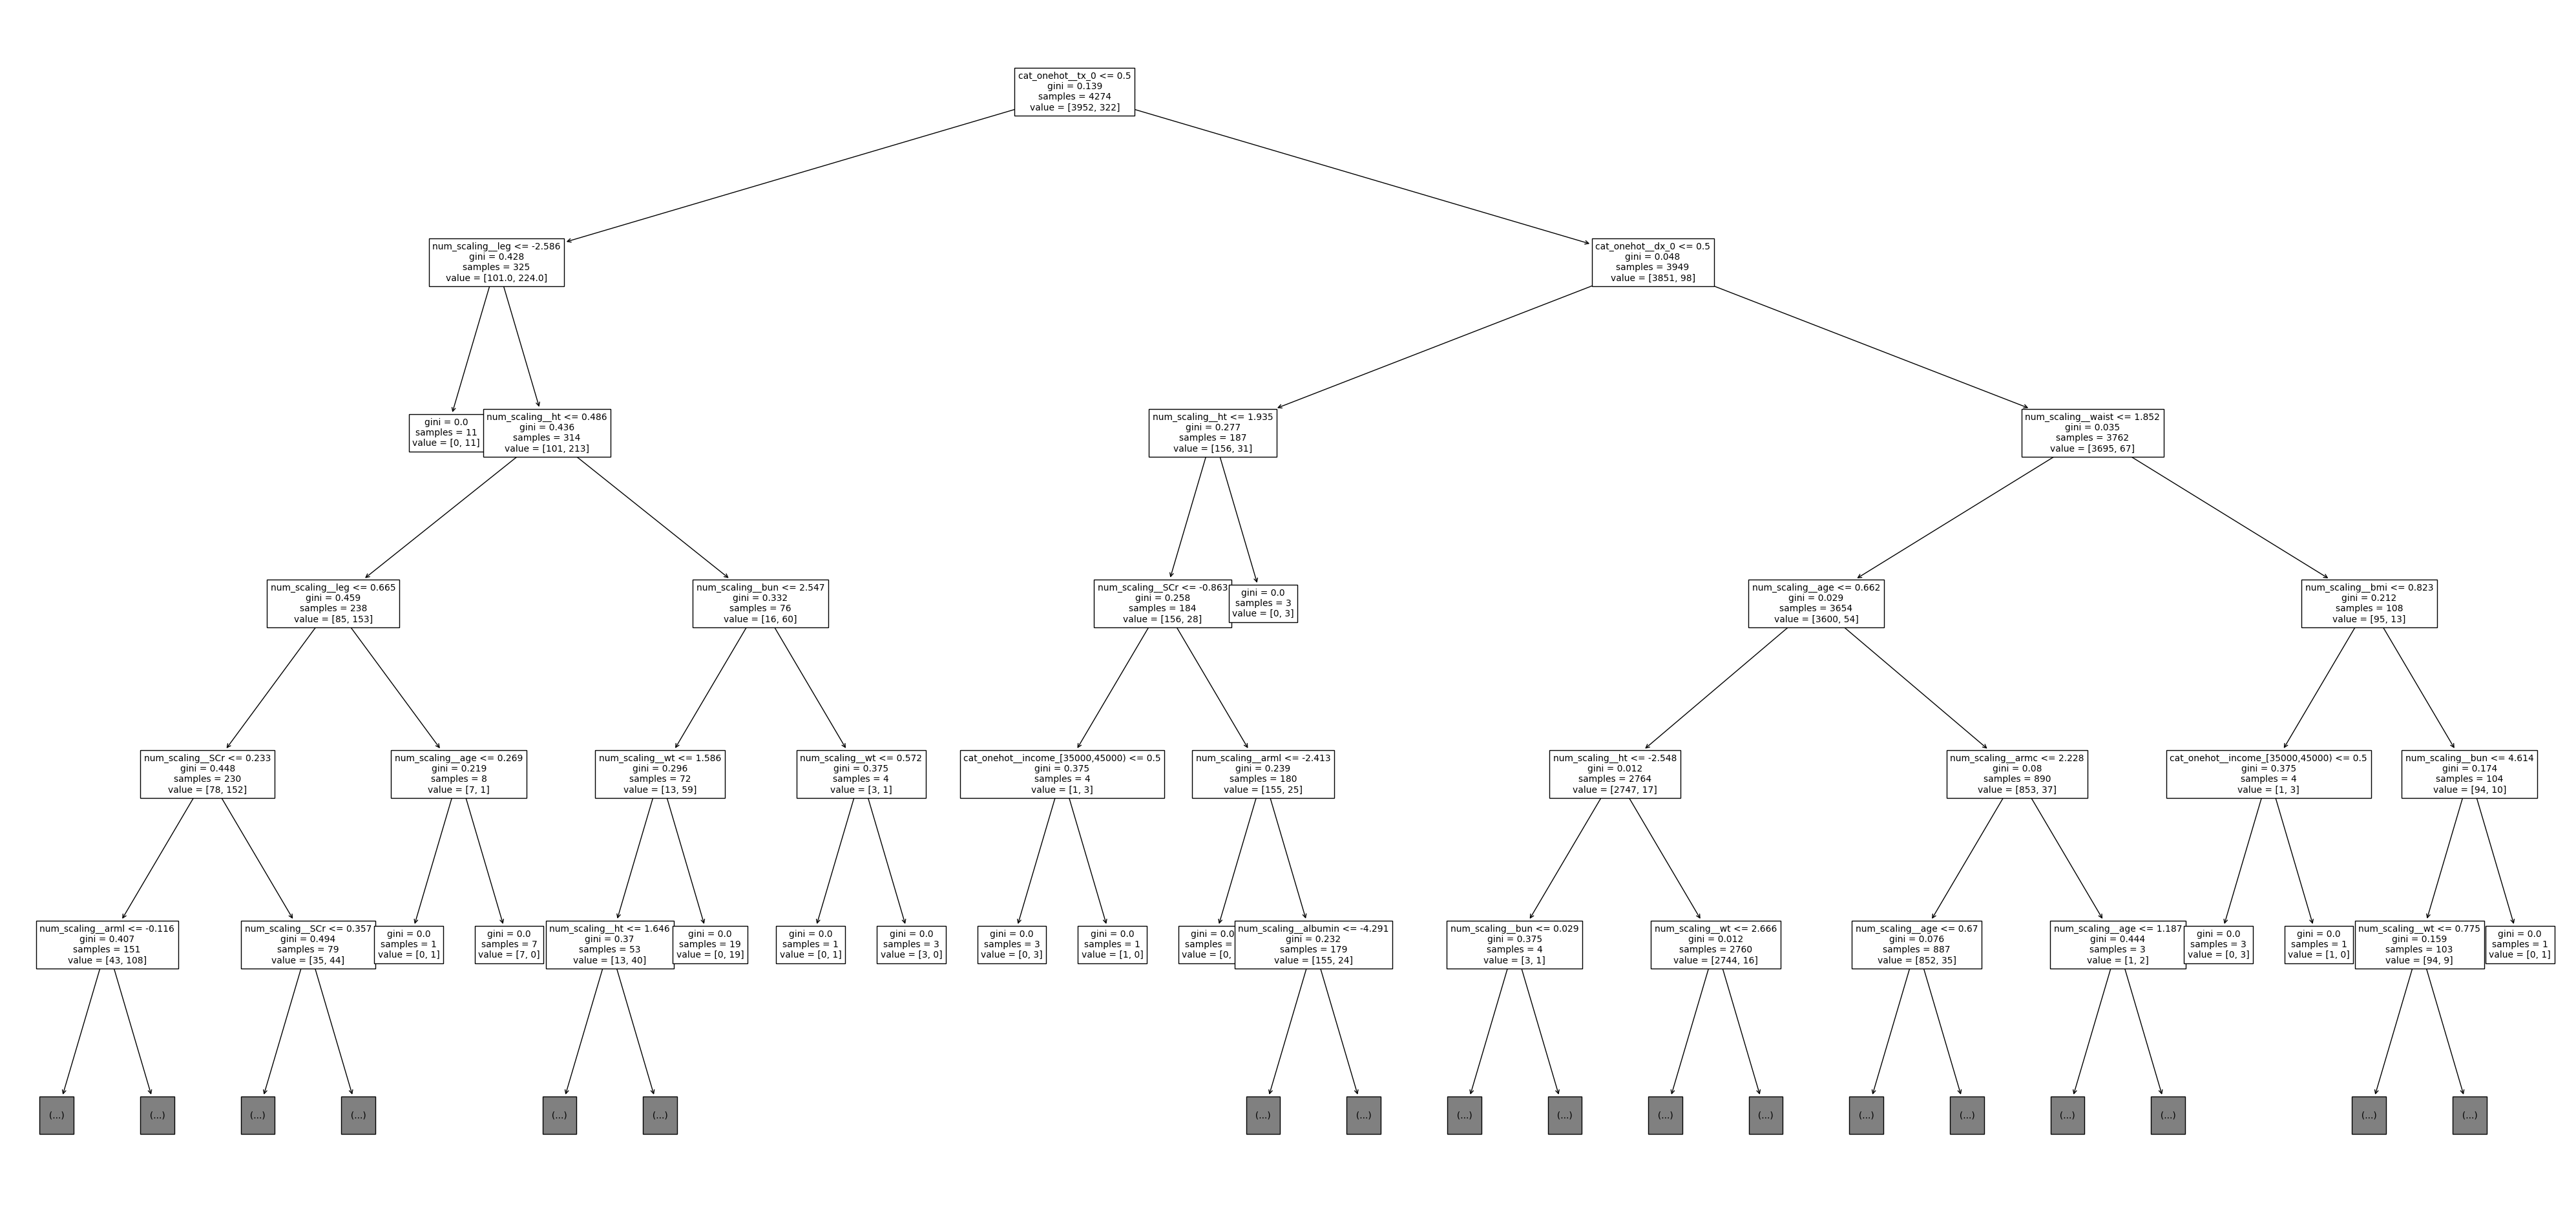

In [73]:
# Decision tree
fig = plt.figure(figsize=(6.4*8, 4.8*5))
plot_tree(decisiontree, feature_names=X_feature_names, max_depth=5, fontsize=10)

The decision tree classifier used `tx`, `leg`, `dx`, `ht`, `waist` as the features which best divided the training dataset by the presence of diabetes. `waist` was also suggested as significant by the logistic regression model.

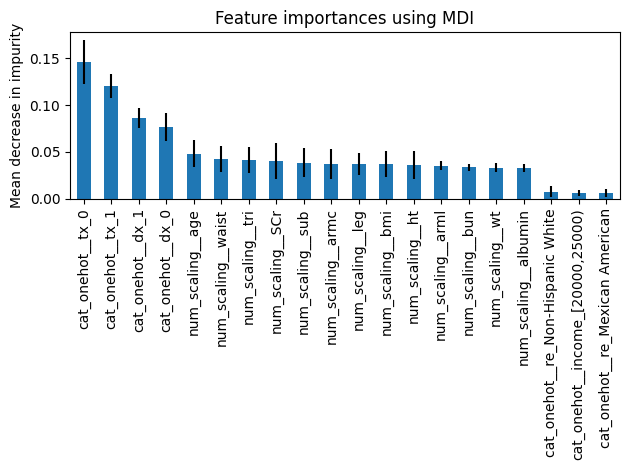

In [81]:
# Random forest feature importance
fig, ax = plt.subplots()

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(rf.feature_importances_, index=X_feature_names).sort_values(ascending=False)

# Plotting bar plot with standard deviation of each feature within the forest
forest_importances[:20].plot.bar(yerr=std[:20], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Finally, the random forest used `tx`, `dx`, `age`, `waist`, `tri` as the features which best divided the training dataset by the presence of diabetes. 

### Discussion
Between the 3 models, the logistic regression and the random forest had 96% accuracy while the decision tree reached only 93%. In particular, the logistic regression had the highest F1 score of 70%, meaning that it's rate of false positive and false negatives is the lowest among the 3 models. The logistic model performance can be further improved by investigating the missing values, and through feature engineering.

The features which stood out the most are the obesity-related factors (such as `waist`), `age` and the `albumin`. I can prioritise these features in handling the missing data.


# 2: Handling missing data
The next important thing is to handle the missing data or NAs. Let's explore the NAs.

In [103]:
pd.set_option('display.max_columns', 500)
gh_data[gh_data.isna().any(axis=1)]

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr,diabetes
9,51643,female,43.000000,Non-Hispanic Black,"[35000,45000)",1,1,107.7,164.3,39.90,32.7,36.5,39.6,129.8,27.0,NaN,11.0,3.6,16.0,2.54,1
10,51645,male,66.416667,Mexican American,"[5000,10000)",0,0,82.9,171.3,28.25,NaN,NaN,NaN,NaN,NaN,NaN,5.7,4.4,9.0,0.86,0
13,51651,female,19.333333,Non-Hispanic Black,"[20000,25000)",0,0,111.6,165.7,40.65,38.5,35.6,40.5,117.4,NaN,NaN,6.2,4.1,9.0,0.71,0
20,51660,male,32.833333,Mexican American,"[25000,35000)",0,0,85.7,159.5,33.69,35.0,37.0,32.6,105.3,20.6,NaN,6.0,4.4,8.0,0.72,0
30,51672,female,27.916667,Non-Hispanic White,"[45000,55000)",0,0,105.8,149.7,47.21,NaN,NaN,NaN,NaN,NaN,NaN,5.2,4.0,10.0,0.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761,62109,female,17.750000,Non-Hispanic Black,"[5000,10000)",0,0,104.8,168.5,36.91,42.0,37.0,42.5,119.5,NaN,NaN,9.5,4.2,6.0,0.58,1
6763,62112,female,58.333333,Other Hispanic,"[10000,15000)",1,1,53.7,147.9,24.55,34.3,32.2,26.2,84.7,23.2,NaN,6.3,4.4,15.0,0.70,0
6776,62136,male,70.333333,Mexican American,"[5000,10000)",0,0,90.5,166.0,32.84,NaN,NaN,NaN,NaN,NaN,NaN,5.7,3.7,8.0,0.78,0
6790,62155,male,33.000000,Mexican American,"[35000,45000)",0,0,94.3,163.5,35.28,34.4,34.7,35.5,112.3,20.2,NaN,5.4,4.1,10.0,0.97,0


At the moment, I'm removing 1452 rows from the initial dataset size of 6795 rows. That is approximately 20%!

In [114]:
# What about just dropping the waist = NA
gh_data_dropna_waist = gh_data.dropna(subset="waist")
gh_data_dropna_waist[gh_data.isna().any(axis=1)]

C:\Users\nakur\AppData\Local\Temp\ipykernel_62428\1867797976.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gh_data_dropna_waist[gh_data.isna().any(axis=1)]


,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr,diabetes
9,51643,female,43.000000,Non-Hispanic Black,"[35000,45000)",1,1,107.7,164.3,39.90,32.7,36.5,39.6,129.8,27.0,NaN,11.0,3.6,16.0,2.54,1
13,51651,female,19.333333,Non-Hispanic Black,"[20000,25000)",0,0,111.6,165.7,40.65,38.5,35.6,40.5,117.4,NaN,NaN,6.2,4.1,9.0,0.71,0
20,51660,male,32.833333,Mexican American,"[25000,35000)",0,0,85.7,159.5,33.69,35.0,37.0,32.6,105.3,20.6,NaN,6.0,4.4,8.0,0.72,0
41,51691,female,57.833333,Non-Hispanic White,NaN,0,0,51.0,157.1,20.66,35.3,34.0,25.4,72.5,24.2,16.7,5.5,4.7,13.0,0.64,0
45,51696,male,54.833333,Non-Hispanic Black,"[15000,20000)",0,0,77.3,170.4,26.62,41.2,36.1,34.3,92.6,11.8,NaN,5.7,4.3,10.0,0.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6751,62092,female,46.750000,Other Race Including Multi-Racial,"[25000,35000)",0,0,80.4,163.4,30.11,40.4,37.0,34.3,91.0,NaN,37.0,5.8,4.6,11.0,0.90,0
6761,62109,female,17.750000,Non-Hispanic Black,"[5000,10000)",0,0,104.8,168.5,36.91,42.0,37.0,42.5,119.5,NaN,NaN,9.5,4.2,6.0,0.58,1
6763,62112,female,58.333333,Other Hispanic,"[10000,15000)",1,1,53.7,147.9,24.55,34.3,32.2,26.2,84.7,23.2,NaN,6.3,4.4,15.0,0.70,0
6790,62155,male,33.000000,Mexican American,"[35000,45000)",0,0,94.3,163.5,35.28,34.4,34.7,35.5,112.3,20.2,NaN,5.4,4.1,10.0,0.97,0


In [125]:
# Then imputing values based on median and mode
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X = preprocess_pipeline.fit_transform(gh_data_dropna_waist[num_attribs + cat_attribs])
X_feature_names = preprocess_pipeline.get_feature_names_out()
y = gh_data_dropna_waist["diabetes"]
print(y.value_counts())

diabetes
0    5958
1     598
Name: count, dtype: int64


Now, there are 6556 observations. Let's visualise them again to check for any wrong imputation.

Model LogisticRegressionCV
Accuracy: 0.9489329268292683
Precision: 0.7
Recall: 0.6116504854368932
F1: 0.6528497409326425
AUC ROC: 0.7946589896167096


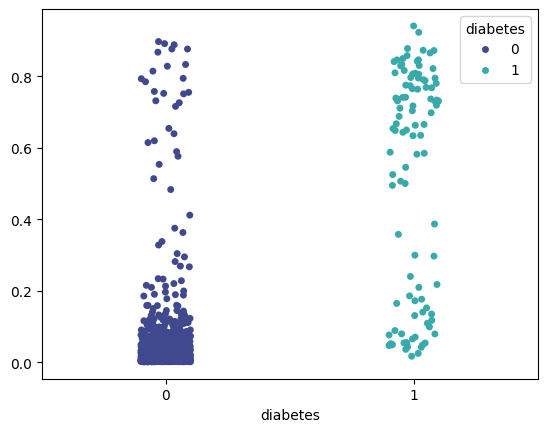

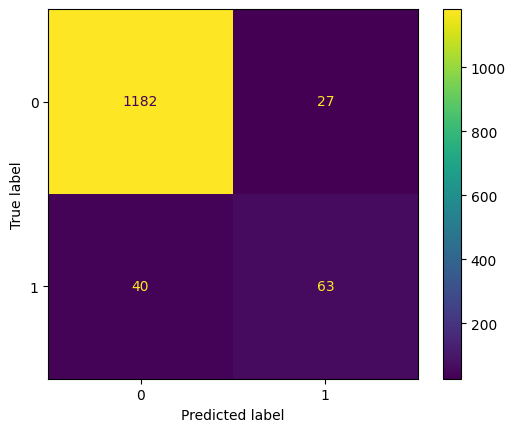

In [133]:
np.random.seed(0) # Set seed for reproducibility

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate logistic regression
logreg = LogisticRegressionCV(cv=10)
logreg.fit(X_train, y_train)
model_accuracy(logreg, X_test, y_test)

Model DecisionTreeClassifier
Accuracy: 0.9077743902439024
Precision: 0.42857142857142855
Recall: 0.5242718446601942
F1: 0.47161572052401746
AUC ROC: 0.7323592473921318


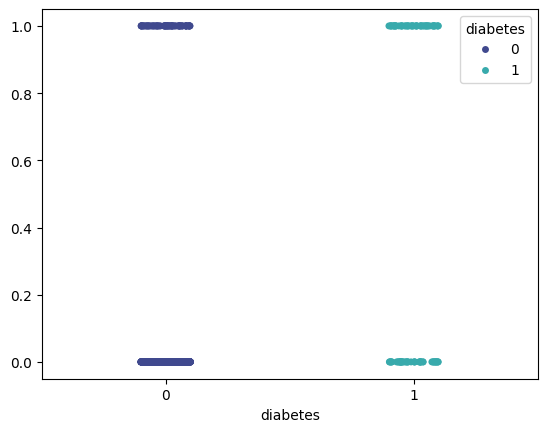

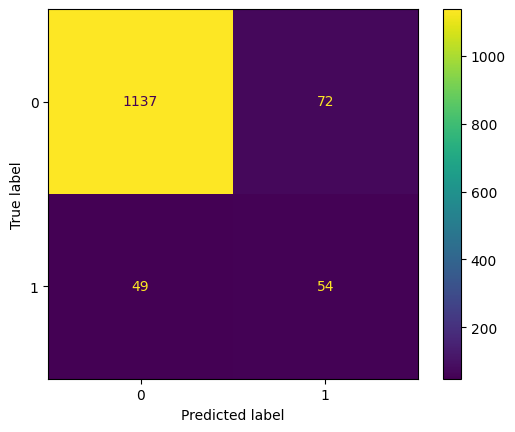

In [136]:
np.random.seed(0) # Set seed for reproducibility

# Instantiate decision tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
model_accuracy(decisiontree, X_test, y_test)

Model RandomForestClassifier
Accuracy: 0.9496951219512195
Precision: 0.6989247311827957
Recall: 0.6310679611650486
F1: 0.6632653061224489
AUC ROC: 0.8039541625510934


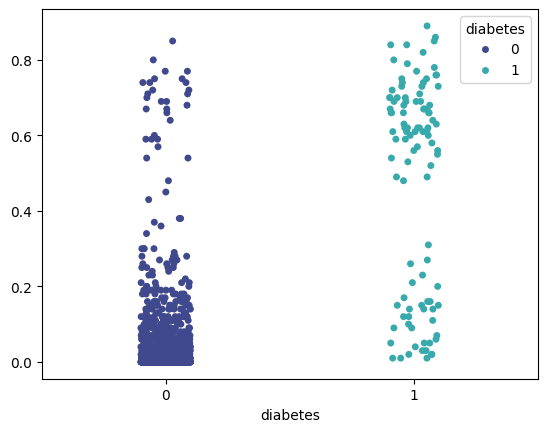

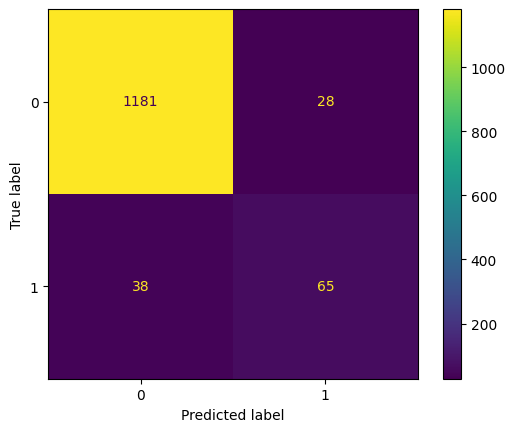

In [138]:
np.random.seed(0) # Set seed for reproducibility
# Instantiate random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
model_accuracy(rf, X_test, y_test)

Using simple imputation, there is a performance decrease in all models. For the logistic regression model:

Before:
Accuracy: 0.966
F1: 0.709

After:
Accuracy: 0.948
F1: 0.652

Hence, it is not recommended to use simple imputation alone.

In [139]:
from sklearn.impute import KNNImputer
num_pipeline_knn = Pipeline([
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

preprocess_pipeline_knn = ColumnTransformer([
        ("num", num_pipeline_knn, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X = preprocess_pipeline_knn.fit_transform(gh_data_dropna_waist[num_attribs + cat_attribs])
X_feature_names = preprocess_pipeline_knn.get_feature_names_out()
y = gh_data_dropna_waist["diabetes"]
print(y.value_counts())

diabetes
0    5958
1     598
Name: count, dtype: int64


Model LogisticRegressionCV
Accuracy: 0.9489329268292683
Precision: 0.7
Recall: 0.6116504854368932
F1: 0.6528497409326425
AUC ROC: 0.7946589896167096


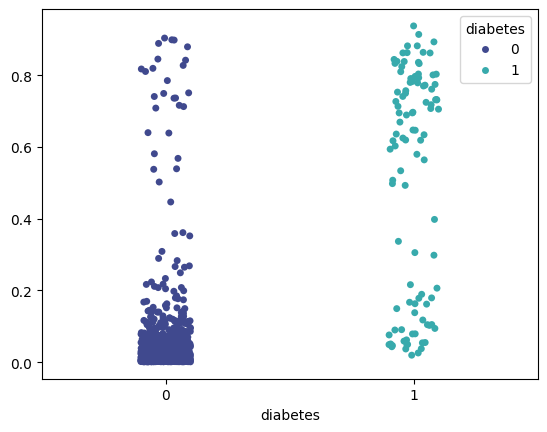

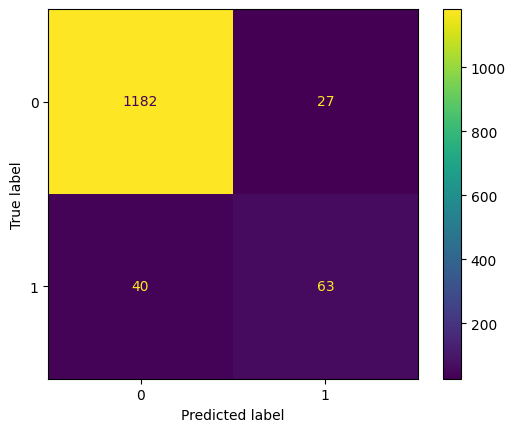

In [140]:
np.random.seed(0) # Set seed for reproducibility

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate logistic regression
logreg = LogisticRegressionCV(cv=10)
logreg.fit(X_train, y_train)
model_accuracy(logreg, X_test, y_test)

# 3: Dimensionality


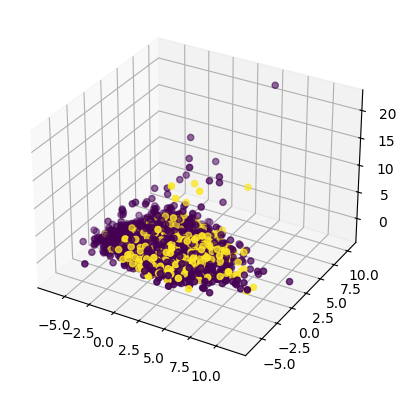

In [167]:
from sklearn.decomposition import KernelPCA
pca_model = KernelPCA(n_components=10).fit(X)
pca = pca_model.transform(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca[:,0], pca[:,1], pca[:,2], c=y)

Model LogisticRegressionCV
Accuracy: 0.9496951219512195
Precision: 0.7078651685393258
Recall: 0.6116504854368932
F1: 0.65625
AUC ROC: 0.7950725545464036


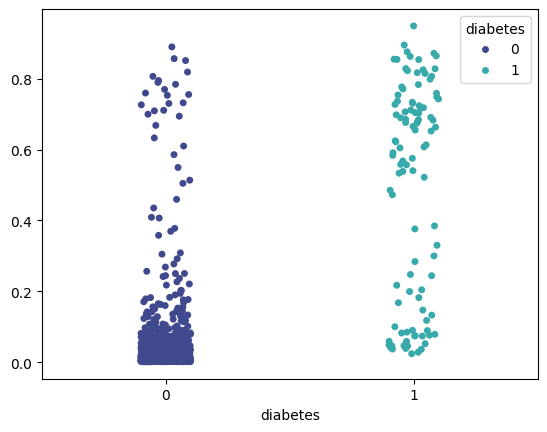

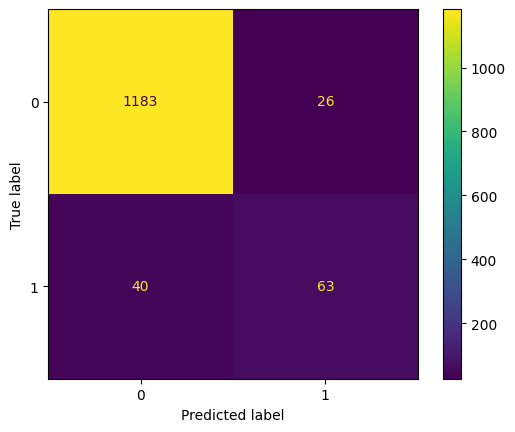

In [168]:
np.random.seed(0) # Set seed for reproducibility

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size=0.2)

# Instantiate logistic regression
logreg = LogisticRegressionCV(cv=10)
logreg.fit(X_train, y_train)
model_accuracy(logreg, X_test, y_test)

It seems that with n_components of 10, I get similar results with logistic regression as compared to the initial.

# 4: Fine tuning Random Forest

In [176]:
# Reset to simple dropna
X = preprocess_pipeline_onehot.fit_transform(gh_data_dropna[num_attribs + cat_attribs])
X_feature_names = preprocess_pipeline_onehot.get_feature_names_out()
y = gh_data_dropna["diabetes"]
print(y.value_counts())

np.random.seed(0) # Set seed for reproducibility

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 51, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


diabetes
0    4959
1     384
Name: count, dtype: int64
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [1, 13, 26, 38, 51, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Fitting 4 folds for each of 50 candidates, totalling 200 fits


Model RandomForestClassifier
Accuracy: 0.9635173058933583
Precision: 0.6716417910447762
Recall: 0.7258064516129032
F1: 0.6976744186046512
AUC ROC: 0.8519796905532242


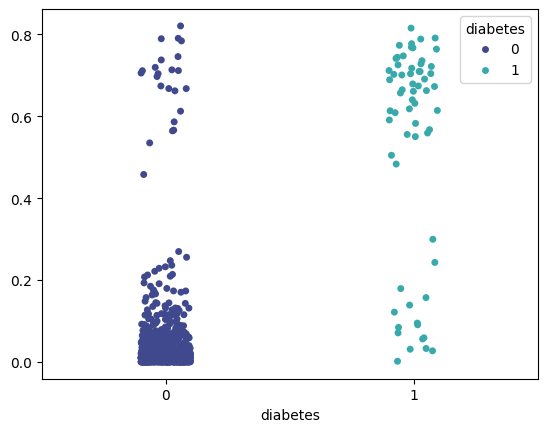

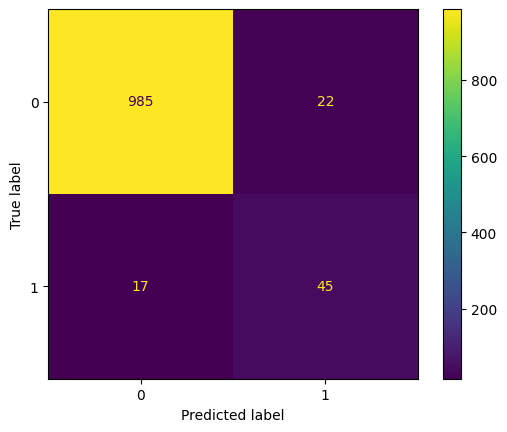

In [177]:
# Instantiate random forest with randomised CV search
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
model_accuracy(rf_random.best_estimator_, X_test, y_test)

# 5: Conclusion
There is not much improvement from finetuning. Accuracy improved slightly from xx

Before: 
Accuracy: 0.960710944808232
Precision: 0.65625
Recall: 0.6774193548387096
F1: 0.6666666666666666
AUC ROC: 0.8277861421661273

After:
Accuracy: 0.9644527595884004
Precision: 0.6764705882352942
Recall: 0.7419354838709677
F1: 0.7076923076923077
AUC ROC: 0.8600442066822565